# 5 Modelling

## 5.1 Imports and Set Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [110]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
import re
import warnings
warnings.filterwarnings("ignore")

In [5]:
import time

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 5.2 Load Datasets
the dataset house_Jan09_2024.csv can be download from wake county real estate website:    
https://drive.google.com/file/d/1-H203Uc65KBJ9ttt78OGPi8CrFCFk_5b/view?usp=drive_link

In [150]:
# load datasets
house = pd.read_csv('house_Jan09_2024.csv', index_col=0)
house.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429


In [151]:
house.columns

Index(['real_estate_id', 'land_sale_price', 'deeded_acreage',
       'total_sale_price', 'assessed_building_value', 'assessed_land_value',
       'deed_book', 'deed_page', 'year_built', 'units', 'heated_area',
       'effective_year', 'story_height', 'foundation_basement_percent',
       'heat_percent', 'air_percent', 'bath', 'bath_fixtures',
       'assessed_grade_difference', 'accrued_assessed_condition_pct',
       'land_deferred_amount', 'historic_deferred_amount', 'recycled_units',
       'physical_zip_code', 'land_sale_year', 'total_sale_year', 'deed_year',
       'land_sale_month', 'total_sale_month', 'deed_month',
       'distance_nearest_city', 'population_per_square_mile',
       'unemployment_rate', 'age_sale', 'age_assess', 'grade', 'fireplace',
       'PI_1', 'PI_2', 'PI_3', 'PI_4'],
      dtype='object')

In [152]:
house.shape

(321670, 41)

In [153]:
house.dtypes

real_estate_id                      int64
land_sale_price                   float64
deeded_acreage                    float64
total_sale_price                    int64
assessed_building_value           float64
assessed_land_value               float64
deed_book                           int64
deed_page                           int64
year_built                        float64
units                               int64
heated_area                       float64
effective_year                    float64
story_height                      float64
foundation_basement_percent         int64
heat_percent                        int64
air_percent                         int64
bath                              float64
bath_fixtures                       int64
assessed_grade_difference         float64
accrued_assessed_condition_pct      int64
land_deferred_amount                int64
historic_deferred_amount            int64
recycled_units                      int64
physical_zip_code                 

## 5.3 Define Useful Functions.

In [154]:
def cross_validate_manual(data, estimator, test_p, n=5):
    train_r2 = []
    test_r2 = []
    train_mae = []
    test_mae = []
    train_rmse = []
    test_rmse = []
    train_length = int(np.floor(len(data)*(1-test_p)))
    res_train = pd.DataFrame(index=range(train_length))
    res_test = pd.DataFrame(index=range(len(data)-train_length))
    
    # check if all continuous
    if np.all(data.dtypes.values) in ['int64', 'float64']:
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            #scale
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train_final = scaler.transform(X_train)
            X_test_final = scaler.transform(X_test)
            
            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
            
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    elif np.all(data.dtypes.values) in ['int64', 'float64', 'category']:               
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            # separate continuous and categorical
            X_train_num = X_train.select_dtypes(['int64', 'float64'])
            X_test_num = X_test.select_dtypes(['int64', 'float64'])
            X_train_cat = X_train.select_dtypes(['category'])
            X_test_cat = X_test.select_dtypes(['category'])
            # only scale continuous
            scaler = StandardScaler()
            scaler.fit(X_train_num)
            X_train_num.iloc[:,:] = scaler.transform(X_train_num)
            X_test_num.iloc[:,:] = scaler.transform(X_test_num)
             # vectorize
            count_vec = CountVectorizer(max_features=100)
            index_train = X_train_cat.index
            index_test = X_test_cat.index
            X_train_cat = pd.DataFrame(count_vec.fit_transform(X_train_cat['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
            X_test_cat = pd.DataFrame(count_vec.transform(X_test_cat['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())
            # combine back
            X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
            X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
        
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    else:
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            # separate 
            X_train_num = X_train.select_dtypes(['int64', 'float64'])
            X_test_num = X_test.select_dtypes(['int64', 'float64'])
            X_train_cat = X_train.select_dtypes(['category'])
            X_test_cat = X_test.select_dtypes(['category'])
            X_train_bool = X_train.select_dtypes(['bool'])
            X_test_bool = X_test.select_dtypes(['bool'])
            # scale
            scaler = StandardScaler()
            scaler.fit(X_train_num)
            X_train_num.iloc[:,:] = scaler.transform(X_train_num)
            X_test_num.iloc[:,:] = scaler.transform(X_test_num)
            # vectorize
            count_vec = CountVectorizer(max_features=100)
            index_train = X_train_cat.index
            index_test = X_test_cat.index
            X_train_cat = pd.DataFrame(count_vec.fit_transform(X_train_cat['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
            X_test_cat = pd.DataFrame(count_vec.transform(X_test_cat['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())
            # combine
            X_train_final = pd.concat([X_train_num, X_train_cat, X_train_bool], axis=1)
            X_test_final = pd.concat([X_test_num, X_test_cat, X_test_bool], axis=1)

            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
        
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            
    res_metrics = pd.DataFrame(index=range(n), data={'train_r2':train_r2, 'test_r2':test_r2,
                            'train_mae':train_mae, 'test_mae':test_mae,
                            'train_rmse':train_rmse, 'test_rmse':test_rmse})
    return res_train, res_test, res_metrics

In [155]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)    #  set not visible about empty axes.

In [156]:
def residual_plot(y_train, y_train_pred, y_test, y_test_pred, figsize=(15, 10)):

    fig, ax = plt.subplots(3, 2, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)

    ax[0,0].scatter(y_train, y_train_pred)
    ax[0,0].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,0].set_xlabel('y train true')
    ax[0,0].set_ylabel('y train predict')

    ax[0,1].scatter(y_test, y_test_pred)
    ax[0,1].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,1].set_xlabel('y test true')
    ax[0,1].set_ylabel('y test predict')

    residuals_train = y_train.values - y_train_pred
    sns.kdeplot(residuals_train, fill=True, ax=ax[1,0])
    ax[1,0].set_xlabel('Residuals')

    sm.qqplot(residuals_train, ax=ax[1,1])
    ax[1,1].set_title("QQ Plot of Residuals")

    sns.scatterplot(x=y_train_pred, y=residuals_train, ax=ax[2,0])
    ax[2,0].plot([0,0.75*10**6],[0,0], color='red')


## 5.4 Hyperparameter Tunning of Gradient Boost Regressor

### 5.4.1 Setup Dataframe

In [157]:
X = house.drop('total_sale_price', axis=1)
y = house['total_sale_price']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [159]:
X_train.shape, X_test.shape

((305586, 40), (16084, 40))

In [160]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.4.2 RandomizedSearchCV

In [17]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 2, 4, 6]}

gb_regressor = GradientBoostingRegressor(random_state=42)
grid_search = RandomizedSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=10, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'learning_rate': 0.2}


In [18]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [19]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9266648415854138 0.9278773462588278
MAE 32280.50474338194 33126.80902296473
RMSE 59340.657428428465 59251.87143667134


## 5.5 Exp_1 max_depth=5

### 5.5.1 Cross Validation

In [18]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [19]:
res_train_1, res_test_1, res_metrics_1 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [20]:
res_metrics_1

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.945826,0.941602,28456.518441,29091.889772,51082.137695,51737.711716
1,0.945609,0.935750,28468.913017,29402.072836,51057.954909,56878.590878
2,0.944843,0.929930,28542.379311,29773.668179,51428.590904,59136.301140
3,0.945960,0.929683,28543.803266,29221.950014,51094.410108,55052.289173
4,0.944268,0.939543,28752.904173,29822.615103,51776.051899,53361.058076
5,0.944660,0.941091,28607.738537,29430.912506,51516.242160,54178.653728
6,0.945136,0.931829,28728.189440,30132.612619,51374.478699,56585.178770
7,0.945061,0.940399,28484.761240,29688.656774,51343.670313,54214.583161
8,0.944716,0.936266,28591.698166,29620.004039,51485.733219,56446.178427
9,0.944475,0.946179,28633.895202,28724.859852,51694.612731,50060.902609


### 5.5.2 Hyperparameter Table

In [55]:
hyperparameter_table = pd.read_csv('GB_hyperparameter_table.csv', index_col=0)
hyperparameter_table = hyperparameter_table.to_dict()
hyperparameter_table

{'Exp': {},
 'n_estimators': {},
 'max_depth': {},
 'learning_rate': {},
 'min_samples_leaf': {},
 'min_sample_split': {},
 'test%': {},
 'num of shuffle': {},
 'label_outlier': {},
 'Train_RMSE_mean': {},
 'Train_RMSE_std': {},
 'Test_RMSE_mean': {},
 'Test_RMSE_std': {}}

In [54]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 1, 100, 5, 0.2, 4, 2, 5, 10, 'No',
                res_metrics_1['train_rmse'].mean(), res_metrics_1['train_rmse'].std(), 
                res_metrics_1['test_rmse'].mean(), res_metrics_1['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][1] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,0.2,4,2,5,10,No,51385.38826,250.110502,54765.14477,2660.582784


## 5.6 Exp_2 max_depth=4

### 5.6.1 Cross Validation

In [23]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [24]:
res_train_2, res_test_2, res_metrics_2 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [25]:
res_metrics_2

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.937340,0.931573,30204.986677,30426.670151,54884.794507,57064.832662
1,0.937193,0.916178,30355.543257,30984.660620,54946.673702,63215.633500
2,0.938540,0.891614,30258.193472,31140.723749,54324.137716,72645.047200
3,0.937028,0.931671,30311.430553,30924.072612,55047.691447,56501.912899
4,0.938718,0.884303,30412.791772,31257.604784,54273.817434,74318.022436
5,0.937239,0.926002,30274.529505,30585.291323,54873.083993,60489.567069
6,0.935874,0.934537,30240.509262,30592.013802,55498.808189,56281.260493
7,0.937003,0.927704,30339.291294,31049.390250,54937.245094,60567.321667
8,0.935866,0.923475,30261.656840,30690.073181,55470.026565,61514.227214
9,0.936823,0.927284,30386.277056,30510.489999,55145.981059,58105.758564


### 5.6.2 Hyperparameter Table

In [56]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 2, 100, 4, 0.2, 4, 2, 5, 10, 'No',
                res_metrics_2['train_rmse'].mean(), res_metrics_2['train_rmse'].std(), 
                res_metrics_2['test_rmse'].mean(), res_metrics_2['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][2] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,0.2,4,2,5,10,No,51385.38826,250.110502,54765.14477,2660.582784
2,GradientBoostingRegressor,2,100,4,0.2,4,2,5,10,No,54940.22597,405.227368,62070.35837,6442.073983


### 5.6.3 Result Analysis             
shuffle#5, largest test_rmse

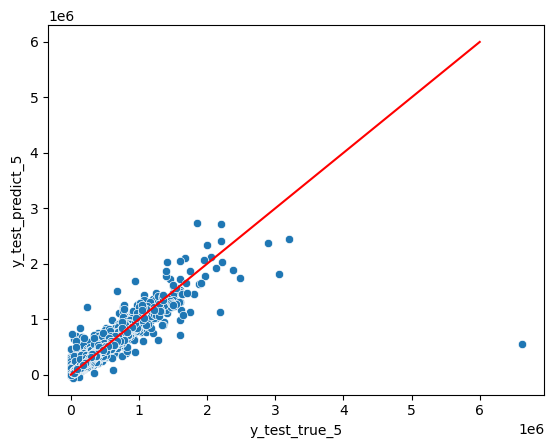

In [78]:
sns.scatterplot(x='y_test_true_5', y='y_test_predict_5', data=res_test_2)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

shuffle#3 second largest test_rmse

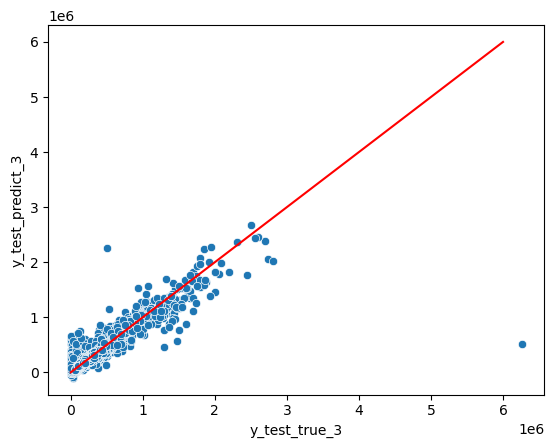

In [79]:
sns.scatterplot(x='y_test_true_3', y='y_test_predict_3', data=res_test_2)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

<font color=red> **from the scatterplot, we can find there are houses with price more than 6 million, which influence the rmse of test set a lot.**

## 5.7 Exp_3 max_depth=3

### 5.7.1 Cross Validation

In [27]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [28]:
res_train_3, res_test_3, res_metrics_3 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [82]:
res_metrics_3

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.926909,0.925240,32314.088379,32227.866403,59374.908936,57730.478837
1,0.927229,0.926658,32252.706505,32832.392583,59120.642920,59595.539319
2,0.926841,0.926352,32322.291454,33051.158993,59159.557652,61915.491344
3,0.928135,0.898987,32407.811073,33497.342710,58569.569640,73896.069437
4,0.926592,0.925523,32474.650893,32375.079390,59501.050707,57668.966686
5,0.926915,0.923226,32210.069767,32451.425219,59316.123526,59636.743925
6,0.927239,0.924526,32202.962627,32896.282209,59014.392573,62393.275143
7,0.926461,0.927506,32531.079281,33270.909361,59444.936892,58998.503624
8,0.927344,0.925864,32130.035536,32745.322763,59098.457031,59446.592912
9,0.927202,0.930320,32284.557546,32226.126739,59208.391269,56643.697306


### 5.7.2 Hyperparameter Table

In [58]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 3, 100, 3, 0.2, 4, 2, 5, 10, 'No',
                res_metrics_3['train_rmse'].mean(), res_metrics_3['train_rmse'].std(), 
                res_metrics_3['test_rmse'].mean(), res_metrics_3['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][3] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,0.2,4,2,5,10,No,51385.38826,250.110502,54765.14477,2660.582784
2,GradientBoostingRegressor,2,100,4,0.2,4,2,5,10,No,54940.22597,405.227368,62070.35837,6442.073983
3,GradientBoostingRegressor,3,100,3,0.2,4,2,5,10,No,59180.80311,266.921813,60792.53585,4940.428414


### 5.7.3 Result Analysis              
shuffle#4 has largest test_rmse

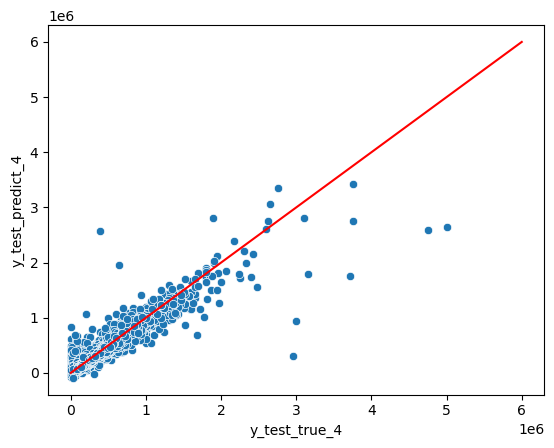

In [83]:
sns.scatterplot(x='y_test_true_4', y='y_test_predict_4', data=res_test_3)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

<font color=red>From the above scatterplots, we can see the model is NOT good at handling outliers in target variable. Maybe we can try to label these outliers in the features.

dataframe histgrams

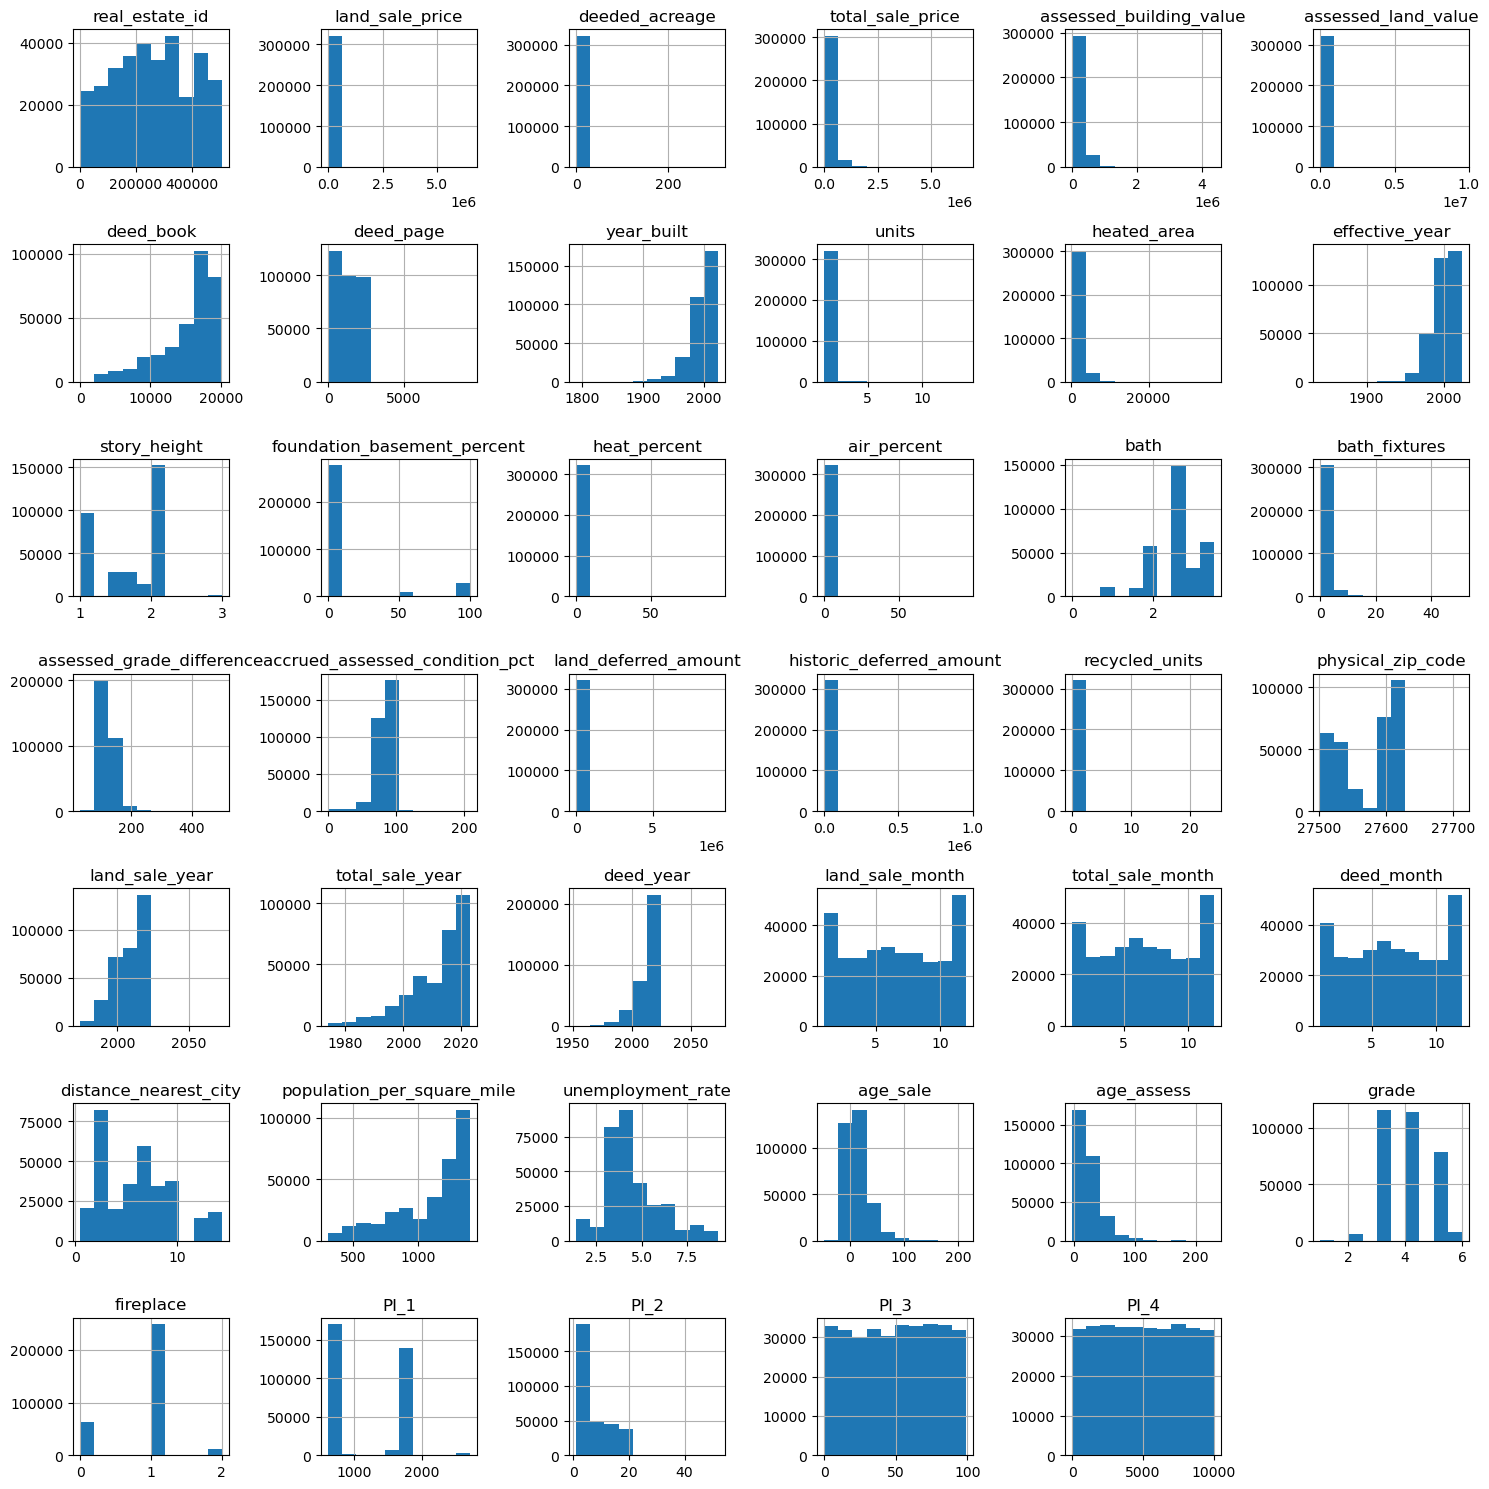

In [123]:
house.hist(figsize=(15,15))
plt.tight_layout()

In [161]:
def threshold(data, columns):
    res = {}
    for column in columns:
        percentile_75 = np.percentile(data[column], 75)
        iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
        threshold = 1.5 * iqr + percentile_75
        res[column] = threshold
    return res

In [162]:
columns = ['land_sale_price', 'deeded_acreage','assessed_building_value', 'assessed_land_value', 'units', 'heated_area',
               'heat_percent', 'air_percent', 'bath_fixtures', 'land_deferred_amount', 'historic_deferred_amount', 'recycled_units']

In [163]:
thresholds = threshold(house, columns)

In [164]:
thresholds

{'land_sale_price': 101250.0,
 'deeded_acreage': 0.775,
 'assessed_building_value': 553707.5,
 'assessed_land_value': 175000.0,
 'units': 1.0,
 'heated_area': 4724.5,
 'heat_percent': 0.0,
 'air_percent': 0.0,
 'bath_fixtures': 0.0,
 'land_deferred_amount': 0.0,
 'historic_deferred_amount': 0.0,
 'recycled_units': 1.0}

In [165]:
def is_outlier(data, threshold):
    if data > threshold:
        return 1
    else:
        return 0

In [166]:
for column in columns:
    house[column + '_is_outlier'] = house[column].apply(lambda x: is_outlier(x, thresholds[column]))

In [167]:
house.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4,land_sale_price_is_outlier,deeded_acreage_is_outlier,assessed_building_value_is_outlier,assessed_land_value_is_outlier,units_is_outlier,heated_area_is_outlier,heat_percent_is_outlier,air_percent_is_outlier,bath_fixtures_is_outlier,land_deferred_amount_is_outlier,historic_deferred_amount_is_outlier,recycled_units_is_outlier
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704,0,1,0,0,0,0,0,0,0,0,0,0
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912,0,0,0,0,0,0,0,0,0,0,0,0
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90,0,0,0,0,0,0,0,0,0,0,0,0
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966,0,0,0,0,0,0,0,0,0,0,0,0
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429,0,0,0,0,0,0,0,0,0,0,0,0


## 5.8 Exp_4 max_depth=3 label outliers

### 5.8.1 Cross Validation

In [35]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [36]:
res_train_4, res_test_4, res_metrics_4 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [37]:
res_metrics_4

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.926116,0.924118,32372.420207,32618.559009,59600.496819,60047.953531
1,0.926566,0.925898,32406.708905,32800.186556,59386.861330,59950.206640
2,0.926994,0.925773,32299.332860,31617.885677,59356.713828,57186.524561
3,0.926812,0.922484,32424.074532,32753.690612,59399.836840,59078.884441
4,0.926963,0.922670,32355.961756,32678.084367,59348.511330,58811.298156
5,0.926932,0.927513,32266.267745,32256.706210,59300.294683,58121.454055
6,0.927247,0.928204,32317.095944,32090.537806,59188.984024,57522.298250
7,0.926547,0.932402,32204.799824,32033.737392,59450.444682,56234.936928
8,0.926815,0.933025,32202.889326,32513.251849,59184.429277,58798.730226
9,0.926317,0.923424,32429.853524,32683.050269,59492.527502,60839.508076


### 5.8.2 Hyperparameter Table

In [60]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 4, 100, 3, 0.2, 4, 2, 5, 10, 'Yes',
                res_metrics_4['train_rmse'].mean(), res_metrics_4['train_rmse'].std(), 
                res_metrics_4['test_rmse'].mean(), res_metrics_4['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][4] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,0.2,4,2,5,10,No,51385.388260,250.110502,54765.144770,2660.582784
2,GradientBoostingRegressor,2,100,4,0.2,4,2,5,10,No,54940.225970,405.227368,62070.358370,6442.073983
3,GradientBoostingRegressor,3,100,3,0.2,4,2,5,10,No,59180.803110,266.921813,60792.535850,4940.428414
4,GradientBoostingRegressor,4,100,3,0.2,4,2,5,10,Yes,59370.910032,128.443577,58659.179486,1421.867163


## 5.9 Exp_5 max_depth=4 label outliers

### 5.9.1 Cross Validation

In [61]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [64]:
res_train_5, res_test_5, res_metrics_5 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [65]:
res_metrics_5

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.936934,0.929452,30203.159711,30814.755154,54997.263429,59244.402367
1,0.936515,0.933885,30381.751705,30925.996973,55295.481419,55097.944791
2,0.936511,0.930067,30387.774806,30851.390475,55240.254058,57817.249511
3,0.936173,0.932413,30501.370634,30976.766053,55411.818509,56355.389033
4,0.936191,0.933070,30389.419366,30848.444522,55346.337645,57201.390328
5,0.935896,0.928207,30452.809385,31392.271504,55535.547865,58009.167690
6,0.937050,0.932179,30291.663374,30526.257599,54979.658479,57440.895927
7,0.936653,0.938193,30334.281573,30344.517042,55233.200627,53310.227782
8,0.937255,0.933017,30154.190534,30896.128729,54889.638692,57094.443346
9,0.937031,0.928196,30266.527034,30585.491980,55123.878627,56300.459038


### 5.9.2 Hyperparameter Table

In [66]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 5, 100, 4, 0.2, 4, 2, 5, 10, 'Yes',
                res_metrics_5['train_rmse'].mean(), res_metrics_5['train_rmse'].std(), 
                res_metrics_5['test_rmse'].mean(), res_metrics_5['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][5] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,0.2,4,2,5,10,No,51385.388260,250.110502,54765.144770,2660.582784
2,GradientBoostingRegressor,2,100,4,0.2,4,2,5,10,No,54940.225970,405.227368,62070.358370,6442.073983
3,GradientBoostingRegressor,3,100,3,0.2,4,2,5,10,No,59180.803110,266.921813,60792.535850,4940.428414
4,GradientBoostingRegressor,4,100,3,0.2,4,2,5,10,Yes,59370.910032,128.443577,58659.179486,1421.867163
5,GradientBoostingRegressor,5,100,4,0.2,4,2,5,10,Yes,55205.307935,206.075201,56787.156981,1655.013172


## 5.10 Exp_6 max_depth=5 label outliers

### 5.10.1 Cross Validation

In [30]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)

In [31]:
res_train_6, res_test_6, res_metrics_6 = cross_validate_manual(house, estimator, test_p=0.05, n=10)

In [32]:
res_metrics_6

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.944996,0.935302,28609.268799,29627.703638,51490.423344,54063.683512
1,0.944735,0.927181,28585.976600,30180.314512,51513.950122,59532.991065
2,0.945152,0.929666,28645.345782,29430.749784,51418.646135,56342.903634
3,0.945023,0.939238,28640.291553,29130.622044,51464.186850,52676.371482
4,0.944625,0.942958,28693.482889,28747.922447,51622.327870,51581.934808
5,0.944978,0.942543,28621.738898,29517.377566,51407.463301,52752.919025
6,0.945415,0.931557,28508.495031,30061.739719,51138.499992,58925.556644
7,0.945280,0.928771,28569.827846,29855.945608,51276.868803,58503.774479
8,0.944591,0.935968,28646.709253,30527.882417,51530.495836,56835.967654
9,0.945171,0.930525,28590.760404,29876.803616,51394.945443,56327.876241


### 5.10.2 Hyperparameter Table

In [34]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 6, 100, 5, 0.2, 4, 2, 5, 10, 'Yes',
                res_metrics_6['train_rmse'].mean(), res_metrics_6['train_rmse'].std(), 
                res_metrics_6['test_rmse'].mean(), res_metrics_6['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][6] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,n_estimators,max_depth,min_sample_split,min_samples_leaf,learning_rate,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,1,100,5,2.0,4,0.2,5,10,No,51385.38826,250.110502,54765.144770,2660.582784
2,GradientBoostingRegressor,2,100,4,2.0,4,0.2,5,10,No,54940.22597,405.227368,62070.358370,6442.073983
3,GradientBoostingRegressor,3,100,3,2.0,4,0.2,5,10,No,59180.80311,266.921813,60792.535850,4940.428414
4,GradientBoostingRegressor,4,100,3,0.2,4,2.0,5,10,Yes,59370.91003,128.443577,58659.179490,1421.867163
5,GradientBoostingRegressor,5,100,4,0.2,4,2.0,5,10,Yes,55205.30794,206.075201,56787.156980,1655.013172
6,GradientBoostingRegressor,6,100,5,0.2,4,2.0,5,10,Yes,51425.78077,137.058706,55754.397854,2838.019275


Based on the table, GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42) has best performance.

## 5.11 Model Performance Test

extract test houses

In [168]:
test_df = house[(house['real_estate_id']==445283)|(house['real_estate_id']==221174)|(house['real_estate_id']==445264)]

In [169]:
house = house[(house['real_estate_id']!=445283)&(house['real_estate_id']!=221174)&(house['real_estate_id']!=445264)]

In [170]:
house.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4,land_sale_price_is_outlier,deeded_acreage_is_outlier,assessed_building_value_is_outlier,assessed_land_value_is_outlier,units_is_outlier,heated_area_is_outlier,heat_percent_is_outlier,air_percent_is_outlier,bath_fixtures_is_outlier,land_deferred_amount_is_outlier,historic_deferred_amount_is_outlier,recycled_units_is_outlier
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704,0,1,0,0,0,0,0,0,0,0,0,0
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912,0,0,0,0,0,0,0,0,0,0,0,0
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90,0,0,0,0,0,0,0,0,0,0,0,0
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966,0,0,0,0,0,0,0,0,0,0,0,0
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
X_train = house.drop('total_sale_price', axis=1)
y_train = house['total_sale_price']

X_scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [172]:
model =  GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.2, min_samples_leaf=4, min_samples_split=2, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=4,
                          random_state=42)

In [173]:
cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

In [174]:
cv_results

{'fit_time': array([432.58463836, 430.42175627, 434.22867274, 433.51934719,
        189.56771326]),
 'score_time': array([0.32529306, 0.30413985, 0.26464319, 0.285501  , 0.15438128]),
 'test_score': array([-30939.16306942, -40364.74479964, -43022.4298102 , -51375.99353965,
        -31627.12865545])}

In [175]:
np.mean(-1*cv_results['test_score'])

39465.891974873295

### 5.11.1 Past Sale Price Test

<font color=red>take out hui's house as test set and use all others as train set

In [176]:
hui_house = test_df[test_df['real_estate_id']==445283]

In [177]:
X_test = hui_house.drop('total_sale_price', axis=1)
y_test = hui_house['total_sale_price']

In [178]:
X_test_scaled = scaler.transform(X_test)

In [179]:
y_test_pred = model.predict(X_test_scaled)

In [180]:
print(f"The True Sale Price for Hui's House is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for Hui's House is {y_test_pred[0]}")

The True Sale Price for Hui's House is 484000
The Predicted Sale Price for Hui's House is 483260.5101092016


<font color=red>it works well on past sale price, BUT can it be used for price forecast?

### 5.11.2 Furure Sale Price Test_1

<font color=red>randomly select one house recently sold

In [184]:
recent_sale_1 = test_df[test_df['real_estate_id']==221174]

<font color=red>update information with recent sale data               
these information can be find from https://services.wake.gov/realestate/Account.asp?id=0221174

In [185]:
recent_sale_1.loc[:, 'total_sale_price'] = 646000
recent_sale_1.loc[:, 'total_sale_year'] = 2023
recent_sale_1.loc[:, 'total_sale_month'] = 11
recent_sale_1.loc[:, 'deed_book'] = 19486
recent_sale_1.loc[:, 'deed_page'] = 2524
recent_sale_1.loc[:, 'deed_year'] = 2023
recent_sale_1.loc[:, 'deed_month'] = 11
recent_sale_1.loc[:, 'population_per_square_mile'] = 1397.79235
recent_sale_1.loc[:, 'unemployment_rate'] =3.4
recent_sale_1.loc[:, 'age_sale'] = 27
recent_sale_1

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4,land_sale_price_is_outlier,deeded_acreage_is_outlier,assessed_building_value_is_outlier,assessed_land_value_is_outlier,units_is_outlier,heated_area_is_outlier,heat_percent_is_outlier,air_percent_is_outlier,bath_fixtures_is_outlier,land_deferred_amount_is_outlier,historic_deferred_amount_is_outlier,recycled_units_is_outlier
51657,221174,60000.0,0.14,646000,291128.0,75000.0,19486,2524,1996.0,1,2506.0,1996.0,1.5,0,0,0,2.0,0,126.0,82,0,0,1,27519.0,2015.0,2023.0,2023.0,10.0,11,11,8.75332,1397.79235,3.4,27.0,24.0,4,1,745,3,11,5369,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
X_test = recent_sale_1.drop('total_sale_price', axis=1)
y_test = recent_sale_1['total_sale_price']
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

In [187]:
print(f"The True Sale Price for House with ID 221174 in Nov 2023 is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for House with ID 221174 in Nov 2023 is {y_test_pred[0]}")

The True Sale Price for House with ID 221174 in Nov 2023 is 646000
The Predicted Sale Price for House with ID 221174 in Nov 2023 is 581916.9317603706


### 5.11.2 Furure Sale Price Test_2

<font color=red>another example

In [188]:
recent_sale_2 = test_df[test_df['real_estate_id']==445264]

<font color=red>update information with recent sale data                  
these information can be find from https://services.wake.gov/realestate/Account.asp?id=0445264

In [189]:
recent_sale_2.loc[:, 'total_sale_price'] = 945000
recent_sale_2.loc[:, 'total_sale_year'] = 2023
recent_sale_2.loc[:, 'total_sale_month'] = 9
recent_sale_2.loc[:, 'bath'] = 4.5
recent_sale_2.loc[:, 'deed_book'] = 19433
recent_sale_2.loc[:, 'deed_page'] = 1498
recent_sale_2.loc[:, 'deed_year'] = 2023
recent_sale_2.loc[:, 'deed_month'] = 9
recent_sale_2.loc[:, 'population_per_square_mile'] = 1397.79235
recent_sale_2.loc[:, 'unemployment_rate'] =3.4
recent_sale_2.loc[:, 'age_sale'] = 5
recent_sale_2

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4,land_sale_price_is_outlier,deeded_acreage_is_outlier,assessed_building_value_is_outlier,assessed_land_value_is_outlier,units_is_outlier,heated_area_is_outlier,heat_percent_is_outlier,air_percent_is_outlier,bath_fixtures_is_outlier,land_deferred_amount_is_outlier,historic_deferred_amount_is_outlier,recycled_units_is_outlier
274643,445264,55000.0,0.15,945000,432409.0,115000.0,19433,1498,2018.0,1,3594.0,2018.0,2.0,0,0,0,4.5,0,133.0,96,0,0,1,27519.0,2018.0,2023.0,2023.0,5.0,9,9,8.75332,1397.79235,3.4,5.0,2.0,5,0,734,2,56,7103,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
X_test = recent_sale_2.drop('total_sale_price', axis=1)
y_test = recent_sale_2['total_sale_price']
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

In [192]:
print(f"The True Sale Price for House with ID 445264 in Sept 2023 is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for House with ID 445264 in Sept 2023 is {y_test_pred[0]}")

The True Sale Price for House with ID 445264 in Sept 2023 is 945000
The Predicted Sale Price for House with ID 445264 in Sept 2023 is 811990.7662440285


## 5.12 Output

In [36]:
pd.DataFrame(hyperparameter_table).to_csv('GB_hyperparameter_table_Jan10_2024.csv')

## 5.13 Summary

1. Based on the model performance test, we can find the model performs very well on past sale data, difference less than 1000 dollar for hui's house.   
3. The model also shows some extent of ability for future data prediction, BUT NOT stong. for house ID221174, the sale price on Nov 2023 is 646000, model predicted is 581916, difference roughly 60000 dollar.
5. For higher price near one million, the model performance is not good, for house ID445264, the sale price on Sept 2023 is 945000, model predicted is 811990, difference roughly 140000 dollar. This is a big difference.
7. I think the main reason for this:
   
   first, house price prediction is a very complex and difficult project, I don't think one simple model can handle this.     
   second, house price prediction needs lots of accurate data especially recent econoimc data and market data, the economic data used for this peoject is not updated and cannot reflect the real market situations.          
   third, streaming data i.e. continuous flow of data that is generated, processed, and made available for real-time house transaction maybe very helpful for house price prediction.

## 5.14 Future Work 

1. incorporating more recent data into the training set could be beneficial, as it may capture evolving trends and market dynamics that impact house prices. 

2. exploring feature engineering techniques or introducing new relevant features, such as economic indicators, neighborhood developments, or seasonality factors, could improve the model's ability to adapt to changing conditions. 

3. Fine-tuning hyperparameters of the Gradient Boosting Regressor or experimenting with alternative algorithms might also be considered to optimize predictive accuracy. 

4. Conducting a thorough analysis of the model's residuals and identifying patterns specific to recent sales could offer insights into areas where the model may need refinement. 

5. combining predictions from multiple models may provide a more robust and accurate prediction for both past and recent house sales.